# Visualizations Part
## Imports

In [19]:
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP

/Users/beese.carsten/opt/anaconda3/envs/FMP_Cheminformatics_2022/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



# 1) Load Data

In [2]:
file_path = "./Data/Cleaned_Dummy_Data.csv"

Bioactives = pd.read_csv(file_path)

## make categories non numerical
#Bioactives.Category = Bioactives.Category.astype("str")
Bioactives.shape

(2363, 171)

In [3]:
Bioactives.head()

,Metadata_EOS,Metadata_Concentration,Metadata_Plate,Category,feature0,feature1,feature2,feature3,feature4,feature5,...,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166
0,EOS100001,10.0,B1001,21,-0.340113,-6.160381,5.041220,0.193125,5.664959,10.365021,...,7.056004,7.200569,7.208704,6.528110,4.949769,-1.551593,-6.876112,-5.357313,-1.237188,2.862012
1,EOS100002,10.0,B1001,3,0.318084,-2.094962,-0.294647,-1.397326,1.659283,1.142868,...,-0.152270,0.151592,0.032867,0.441463,0.427858,1.434103,0.504684,-0.287677,1.503462,0.059650
2,EOS100003,10.0,B1001,17,0.494341,3.917216,13.266124,-0.780008,-0.418166,-0.395327,...,4.037598,3.025693,4.319620,8.073606,3.486751,-7.027011,-3.648018,-1.935674,1.343256,-2.503014
3,EOS100004,10.0,B1001,2,1.194720,0.389072,1.180834,-0.798421,-0.239483,-0.223973,...,0.651479,-0.484511,0.435140,-0.511430,-1.213946,3.958408,-0.656151,1.001920,2.006217,-1.302373
4,EOS100005,10.0,B1001,2,0.964102,-1.365030,-0.901661,0.725072,0.689783,1.552019,...,-0.478705,-0.092207,0.258025,-0.585153,-1.484183,3.857526,0.719787,1.049718,1.821790,-1.240878


# 2) Histograms of single features

## 2.1) Classic histogram with binning

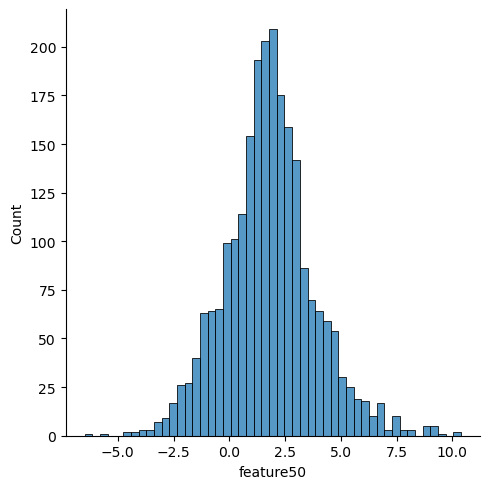

In [4]:
p1 = sns.displot(
    Bioactives, 
    x = "feature50"
)
plt.show()
p1.figure.savefig("./Figures/" + str(date.today()) + "_Histogram.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

## 2.2) Density distribution

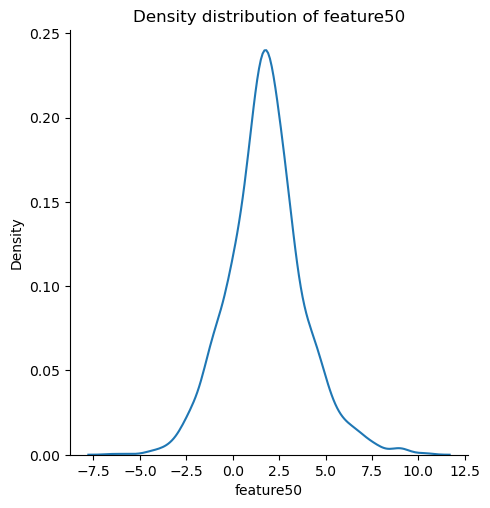

In [5]:
p2 = sns.displot(
    Bioactives, 
    x = "feature50",
    kind="kde"
)
p2.set(title = 'Density distribution of feature50') ### adding plot titles
plt.show()
p2.figure.savefig("./Figures/" + str(date.today()) + "_Density.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

### 2.21) use category to color different conditions

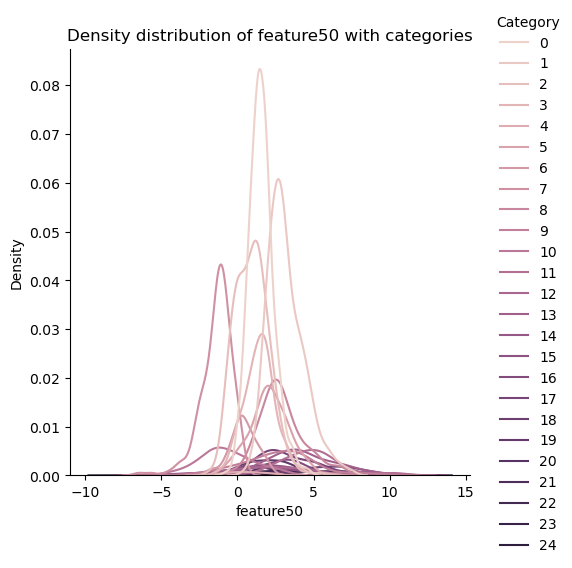

In [6]:
p2 = sns.displot(
    Bioactives, 
    x = "feature50",
    hue = "Category",
    kind="kde"
)
p2.set(title = 'Density distribution of feature50 with categories') ### adding plot titles

plt.show()
p2.figure.savefig("./Figures/" + str(date.today()) + "_Density with categories.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

## 2.3) maybe introduce subplots?

# 3) Boxplots

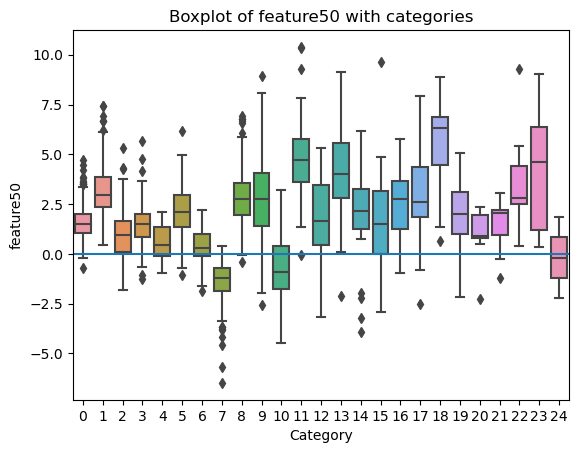

In [7]:
p3 = sns.boxplot(
    data = Bioactives, 
    x = "Category",
    y = "feature50"
)
p3.set(title = 'Boxplot of feature50 with categories') ### adding plot titles
p3.axhline(0) ### makes a nice horizontal line at 0

plt.show()
p3.figure.savefig("./Figures/" + str(date.today()) + "_boxplot.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

# 4) Dimensionality reduction

## 4.1) 2D PCA
principal component analysis, the classic way to reduce dimensionality and visualize multi-parametric datasets in 2D or 3D

### 4.11) Data Normalization
since PCA depends on the variability of each feature, we have to make sure that the variance in all features is equal

In [8]:
### we only work with the features not with the metadata
x = Bioactives.loc[:, Bioactives.columns.str.startswith("feature")]
normalized_data = StandardScaler().fit_transform(x) # normalizing the features. Actually the data already is normalized by pyCytoMiner!!!!!



### 4.12) Transform Data

In [9]:
### initialize PCA model
pca = PCA(n_components=2, random_state=0)

### transform data
proj_PCA = pca.fit_transform(normalized_data)

### Create a DataFrame with the principal component values and merge it with the metadata of our original data
proj_PCA_df = pd.DataFrame(data = proj_PCA,
                       columns = ['Axis 1', 'Axis 2'])

meta_cols = ["Metadata_EOS", "Metadata_Concentration", "Metadata_Plate", "Category"]
PCA_Data = pd.merge(Bioactives.loc[:, meta_cols], proj_PCA_df, left_index = True, right_index = True)

### 4.13) Info
in PCA we can calculate how much of our original data is explained by each principle component

In [10]:
print("Explained Variance")
for i in range(0,2):
    print("Axis", i+1, ":", round(pca.explained_variance_ratio_[i], 4)*100, "%")

Explained Variance
Axis 1 : 24.37 %
Axis 2 : 14.11 %


### 4.14) Scatterplot

In [11]:
### sometimes it is nicer to plot the categories if they are not numerical
PCA_Data = PCA_Data.sort_values("Category")
PCA_Data.Category = PCA_Data.Category.astype("str")

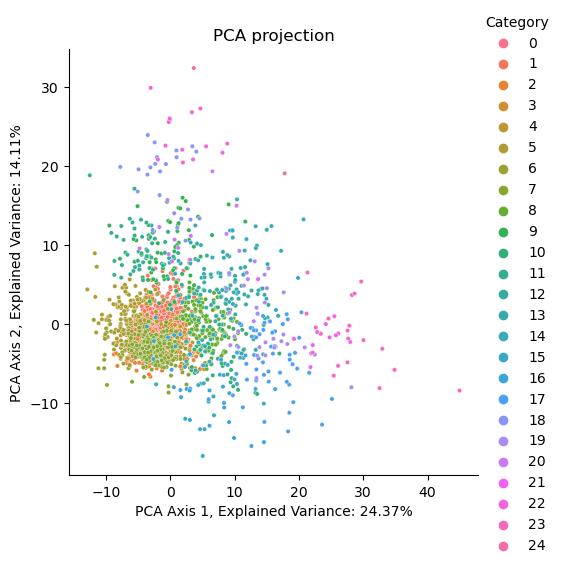

In [20]:
p1 = sns.relplot(
    data = PCA_Data,
    x="Axis 1", 
    y="Axis 2",
    hue = "Category",  
    s = 10
)

p1.set(xlabel = "PCA Axis 1, Explained Variance: " + str(round(pca.explained_variance_ratio_[0], 4)*100) + "%", 
       ylabel = "PCA Axis 2, Explained Variance: " + str(round(pca.explained_variance_ratio_[1], 4)*100) + "%", 
       title = "PCA projection")
plt.show()
p1.figure.savefig("./Figures/" + str(date.today()) + "_PCA_2D.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

## 4.2) 3D PCA 
of course we can also select more than 2 dimensions in the PCA. here we will use plotly to create an innteractive 3D plot

### 4.21) Normalize and transform data

In [16]:
### Normalization
x = Bioactives.loc[:, Bioactives.columns.str.startswith("feature")]
normalized_data = StandardScaler().fit_transform(x) # normalizing the features. Actually the data already is normalized by pyCytoMiner!!!!!

### initialize PCA model
pca_3D = PCA(n_components=3, random_state=0)

### transform data
proj_3D_PCA = pca_3D.fit_transform(normalized_data)

### Create a DataFrame with the principal component values and merge it with the metadata of our original data
proj_3D_PCA_df = pd.DataFrame(data = proj_3D_PCA,
                       columns = ['Axis 1', 'Axis 2', 'Axis 3'])

meta_cols = ["Metadata_EOS", "Metadata_Concentration", "Metadata_Plate", "Category"]
PCA_3D_Data = pd.merge(Bioactives.loc[:, meta_cols], proj_3D_PCA_df, left_index = True, right_index = True)

print("Explained Variance")
for i in range(0,3):
    print("Axis", i+1, ":", round(pca_3D.explained_variance_ratio_[i], 4)*100, "%")

Explained Variance
Axis 1 : 24.37 %
Axis 2 : 14.11 %
Axis 3 : 8.469999999999999 %


### 4.22) 3D Scatterplot with plotly

In [27]:
### sometimes it is nicer to plot the categories if they are not numerical
PCA_3D_Data = PCA_3D_Data.sort_values("Category")
PCA_3D_Data.Category = PCA_3D_Data.Category.astype("str")

In [28]:
fig = px.scatter_3d(PCA_3D_Data, 
                    x='Axis 1', 
                    y='Axis 2', 
                    z='Axis 3',
                    color = "Category",
                    hover_data=['Metadata_EOS', "Metadata_Plate", "Metadata_Concentration"])

fig.update_layout(
    autosize=False,
    width=1300, ### change width
    height=900, ### change height
    #title = "If you want a title it goes here"])
    )

### marker size
fig.update_traces(marker={'size': 5})

fig.show()

### save as html file!
fig.write_html("./Figures/" + str(date.today()) + "_PCA_3D.html")

## 4.3) 2D UMAP projection
UMAP is another dimennsionality reduction algorithm. it is superior to PCA because it is a non-linear transformation, which allows us to visualize finer differences in the data and not only focus on the data with the greatest variance.
The steps are similar to PCA: normalization, transformation and visualization

### 4.31) Normalization and transformation

In [23]:
### Normalization
x = Bioactives.loc[:, Bioactives.columns.str.startswith("feature")]
normalized_data = StandardScaler().fit_transform(x) # normalizing the features. Actually the data already is normalized by pyCytoMiner!!!!!

### initialize UMAP model
umap_2D = UMAP(n_components=2, init='random', random_state=0)

### transform data
proj_2D_UMAP = umap_2D.fit_transform(normalized_data)

### Create a DataFrame with the principal component values and merge it with the metadata of our original data
proj_2D_UMAP_df = pd.DataFrame(data = proj_2D_UMAP,
                       columns = ['Axis 1', 'Axis 2'])

meta_cols = ["Metadata_EOS", "Metadata_Concentration", "Metadata_Plate", "Category"]
UMAP_2D_Data = pd.merge(Bioactives.loc[:, meta_cols], proj_2D_UMAP_df, left_index = True, right_index = True)


### 4.32) Scatterplot

In [25]:
### sometimes it is nicer to plot the categories if they are not numerical
UMAP_2D_Data = UMAP_2D_Data.sort_values("Category")
UMAP_2D_Data.Category = UMAP_2D_Data.Category.astype("str")

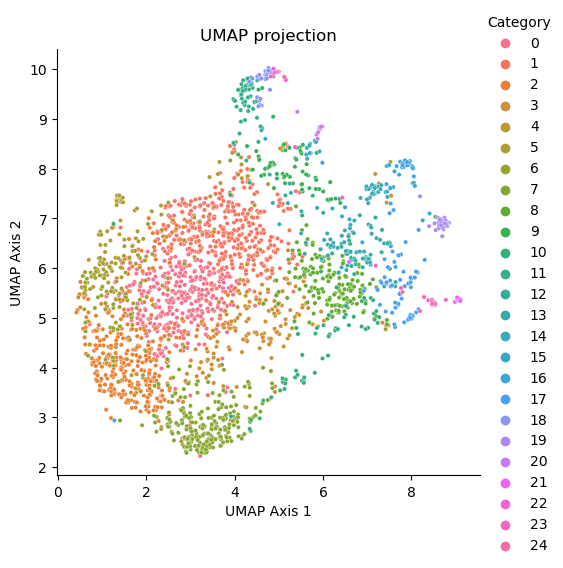

In [26]:
p1 = sns.relplot(
    data = UMAP_2D_Data,
    x="Axis 1", 
    y="Axis 2",
    hue = "Category",  
    s = 10
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = "UMAP projection")
plt.show()
p1.figure.savefig("./Figures/" + str(date.today()) + "_UMAP_2D.png", transparent=False, bbox_inches='tight', dpi = 600)
plt.close()

## 4.4) 3D UMAP
### 4.41) Normalization and transformation

In [29]:
### Normalization
x = Bioactives.loc[:, Bioactives.columns.str.startswith("feature")]
normalized_data = StandardScaler().fit_transform(x) # normalizing the features. Actually the data already is normalized by pyCytoMiner!!!!!

### initialize UMAP model
umap_3D = UMAP(n_components=3, init='random', random_state=0)

### transform data
proj_3D_UMAP = umap_3D.fit_transform(normalized_data)

### Create a DataFrame with the principal component values and merge it with the metadata of our original data
proj_3D_UMAP_df = pd.DataFrame(data = proj_3D_UMAP,
                       columns = ['Axis 1', 'Axis 2', 'Axis 3'])

meta_cols = ["Metadata_EOS", "Metadata_Concentration", "Metadata_Plate", "Category"]
UMAP_3D_Data = pd.merge(Bioactives.loc[:, meta_cols], proj_3D_UMAP_df, left_index = True, right_index = True)


### 4.42) Scatterplot

In [31]:
### sometimes it is nicer to plot the categories if they are not numerical
UMAP_3D_Data = UMAP_3D_Data.sort_values("Category")
UMAP_3D_Data.Category = UMAP_3D_Data.Category.astype("str")

In [32]:
fig = px.scatter_3d(UMAP_3D_Data, 
                    x='Axis 1', 
                    y='Axis 2', 
                    z='Axis 3',
                    color = "Category",
                    hover_data=['Metadata_EOS', "Metadata_Plate", "Metadata_Concentration"])

fig.update_layout(
    autosize=False,
    width=1300, ### change width
    height=900, ### change height
    #title = "If you want a title it goes here"])
    )

### marker size
fig.update_traces(marker={'size': 5})

fig.show()

### save as html file!
fig.write_html("./Figures/" + str(date.today()) + "_UMAP_3D.html")